# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [18]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/user/Downloads/'

In [19]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [20]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [22]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [23]:
a=app_train.corr().sort_values(['TARGET'],ascending=True)
a.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
EXT_SOURCE_3,0.000222,-0.178919,-0.005762,-0.015503,0.040281,-0.042710,-0.030229,0.043516,0.030752,0.047717,...,-0.002590,-0.013837,-0.013058,-0.001193,-0.007190,-0.021258,-0.007856,-0.025131,-0.071449,0.115263
EXT_SOURCE_2,0.002342,-0.160472,0.015964,0.053814,0.002576,-0.018015,0.060925,0.131228,0.125804,0.139367,...,0.003256,0.000614,-0.007236,-0.004077,0.000553,0.001507,0.051981,-0.002849,-0.021984,-0.019508
EXT_SOURCE_1,0.000082,-0.155317,-0.013736,-0.058483,0.080234,-0.138470,0.026232,0.168429,0.119398,0.175502,...,0.005131,-0.005102,-0.019208,-0.003963,-0.005087,-0.001801,0.030820,-0.003631,0.006562,0.294291
DAYS_BIRTH,0.001500,-0.078239,-0.086364,-0.129879,0.119146,-0.330938,-0.027261,0.055436,-0.009445,0.053442,...,-0.003614,-0.009015,-0.027282,-0.005285,-0.002255,0.001336,-0.001372,0.011799,0.071983,0.619947
DAYS_EMPLOYED_ANOM,0.001368,-0.045987,-0.054967,-0.154778,0.070107,-0.240722,-0.064038,-0.065594,-0.103608,-0.063569,...,-0.010047,-0.010182,-0.008578,-0.004729,0.000444,0.003043,-0.034111,0.015252,0.050001,1.000000
FLOORSMAX_AVG,0.004851,-0.044003,0.025687,0.047174,0.004989,-0.009705,0.060171,0.103296,0.130174,0.108512,...,0.000900,-0.002702,-0.005814,0.003101,0.002946,-0.000050,0.046762,-0.000841,-0.019750,-0.016038
FLOORSMAX_MEDI,0.004588,-0.043768,0.025363,0.047162,0.005161,-0.009447,0.059682,0.102770,0.129179,0.107936,...,0.000879,-0.002662,-0.005831,0.003301,0.002752,0.000082,0.045992,-0.000724,-0.019865,-0.016118
FLOORSMAX_MODE,0.004386,-0.043226,0.024052,0.046389,0.006630,-0.009550,0.057675,0.100418,0.126302,0.105532,...,0.000908,-0.002362,-0.005814,0.003470,0.002535,0.000317,0.044121,-0.000361,-0.019111,-0.015121
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.185850,0.120310,-0.045537,-0.001827,0.159610,0.986968,0.775109,1.000000,...,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998,-0.063569
REGION_POPULATION_RELATIVE,0.000849,-0.037227,0.026867,0.041314,0.015175,-0.025573,0.074796,0.099738,0.118429,0.103520,...,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003,-0.004037


In [24]:
a.tail(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
DEF_60_CNT_SOCIAL_CIRCLE,0.001187,0.031276,-0.006546,-0.015503,0.008976,-0.001861,-0.013135,-0.023767,-0.024001,-0.024506,...,-0.003063,0.000157,0.000393,-0.001461,-0.001822,-0.002536,-0.001462,-0.000291,0.017190,0.014064
DEF_30_CNT_SOCIAL_CIRCLE,-0.000082,0.032248,-0.008607,-0.015154,0.009410,-0.001262,-0.013244,-0.021229,-0.022833,-0.022244,...,-0.003363,0.000203,-0.000652,-0.000177,-0.001272,-0.002167,0.000331,-0.001302,0.018590,0.016591
LIVE_CITY_NOT_WORK_CITY,0.000067,0.032518,-0.004999,0.088061,-0.035991,0.069957,0.008285,0.000081,0.010084,-0.001309,...,-0.002035,0.001877,0.004401,-0.000924,-0.001960,-0.003325,-0.007592,-0.006792,-0.008415,-0.219234
OWN_CAR_AGE,0.001818,0.037612,0.010602,NaN,0.001496,0.008494,-0.117273,-0.094191,-0.097057,-0.103733,...,-0.004992,-0.007458,0.001236,-0.000202,-0.008650,0.001661,-0.021867,-0.017632,-0.014384,0.028291
DAYS_REGISTRATION,-0.000973,0.041975,0.020557,0.087766,-0.025224,0.183395,0.027805,0.009621,0.038514,0.011565,...,0.004764,0.006971,0.003859,-0.002855,-0.000508,-0.001069,-0.011353,-0.001308,-0.024805,-0.212417
FLAG_DOCUMENT_3,-0.003411,0.044346,-0.479724,-0.070000,-0.036839,0.056837,-0.016751,0.096365,0.102843,0.074900,...,0.009423,0.007396,-0.025510,-0.000761,0.000982,0.008175,0.010360,0.009576,0.048214,-0.248508
REG_CITY_NOT_LIVE_CITY,-0.001885,0.044395,0.013586,0.003123,-0.061709,0.020072,0.003574,-0.026886,-0.006214,-0.027212,...,-0.005119,-0.001181,0.002614,0.000549,-0.002152,-0.001517,-0.010881,0.000933,-0.004793,-0.092175
FLAG_EMP_PHONE,-0.001337,0.045982,0.054938,0.154659,-0.070021,0.240714,0.063994,0.065519,0.103533,0.063487,...,0.010049,0.010183,0.008579,0.004619,-0.000438,-0.003028,0.034092,-0.015271,-0.049949,-0.999868
REG_CITY_NOT_WORK_CITY,-0.001582,0.050994,0.004487,0.076081,-0.061889,0.070650,0.006431,-0.018856,0.000896,-0.020333,...,-0.003854,0.000703,0.003487,0.000481,-0.001982,-0.002753,-0.012182,-0.005227,-0.008013,-0.256454
DAYS_ID_PUBLISH,-0.000384,0.051457,0.052847,0.013661,0.006664,-0.028019,0.008506,-0.006575,0.011268,-0.009267,...,0.000903,0.000070,0.017246,0.004761,-0.000999,-0.001249,-0.009660,-0.006200,-0.035099,-0.273633


In [41]:
app_train['OWN_CAR_AGE']

0          NaN
1          NaN
2         26.0
3          NaN
4          NaN
5          NaN
6         17.0
7          8.0
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13        23.0
14         NaN
15        17.0
16         NaN
17         NaN
18         NaN
19         NaN
20         7.0
21        14.0
22         NaN
23         NaN
24         7.0
25         NaN
26         NaN
27         NaN
28         1.0
29         NaN
          ... 
307481     NaN
307482    11.0
307483     NaN
307484     1.0
307485     NaN
307486     9.0
307487     NaN
307488     NaN
307489     NaN
307490     NaN
307491    15.0
307492     2.0
307493     NaN
307494    15.0
307495     2.0
307496     NaN
307497     0.0
307498    10.0
307499     NaN
307500     NaN
307501     NaN
307502     NaN
307503     NaN
307504     NaN
307505     NaN
307506     NaN
307507     NaN
307508     NaN
307509     NaN
307510     NaN
Name: OWN_CAR_AGE, Length: 307511, dtype: float64

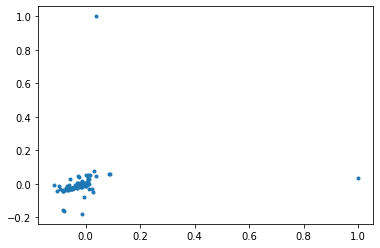

In [44]:
plt.plot(a['OWN_CAR_AGE'], a['TARGET'], '.')
plt.show()


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


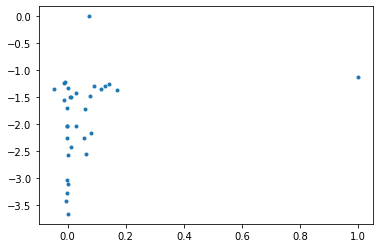

In [45]:
plt.plot(a['DAYS_EMPLOYED'], np.log10(a['TARGET']), '.')
plt.show()